# wide和deep的意义

wide linear model (for memorization)

a wide set of cross-product feature transformations are effective and intepretable.但是泛化需要更多的特征工程.不能泛化出训练数据中未出现的cross feature


deep neural network (for generalization)

factorization machines 和 deep nerual network 都是基于embedding的模型。wide & deep 是对factorization machines的改进，后者用dot product，前者用neural network.

泛化能力更强。但是对于稀疏的user-itme matrix可能过于泛化。(什么是过度泛化:http://iameduard.com/overgeneralization/ ) 例如某个用户只喜欢一类商品，但是
embedding类的模型会导致推荐不可能的query-item pair。相反，线性模型可以记住这些特例，
而不过度泛化。


对于推荐系统来说，memorization考虑用户购买过的商品，而generalization是提高推荐的多样性（用户没有想到过的？）


# 作用

稀疏的输入（例如一些类别特征，具有大量的可能值)

适用于推荐系统、搜索、排序问题

# 代码

https://github.com/tensorflow/models/tree/master/official/wide_deep

API https://www.tensorflow.org/api_docs/python/tf/estimator/DNNLinearCombinedClassifier

https://tf-docs.readthedocs.io/en/latest/tensorflow/g3doc/tutorials/wide_and_deep/

# 论文

https://arxiv.org/pdf/1606.07792.pdf


# The wide and deep model truly shines on larger data sets with high-cardinality features, where each feature has millions/billions of unique possible values (which is the specialty of the wide model).

推荐系统首先根据查询条件缩小ranking范围（通过机器学习模型和人工规则等），第二步再通过ranking model排序。**这里关注的是第二步**

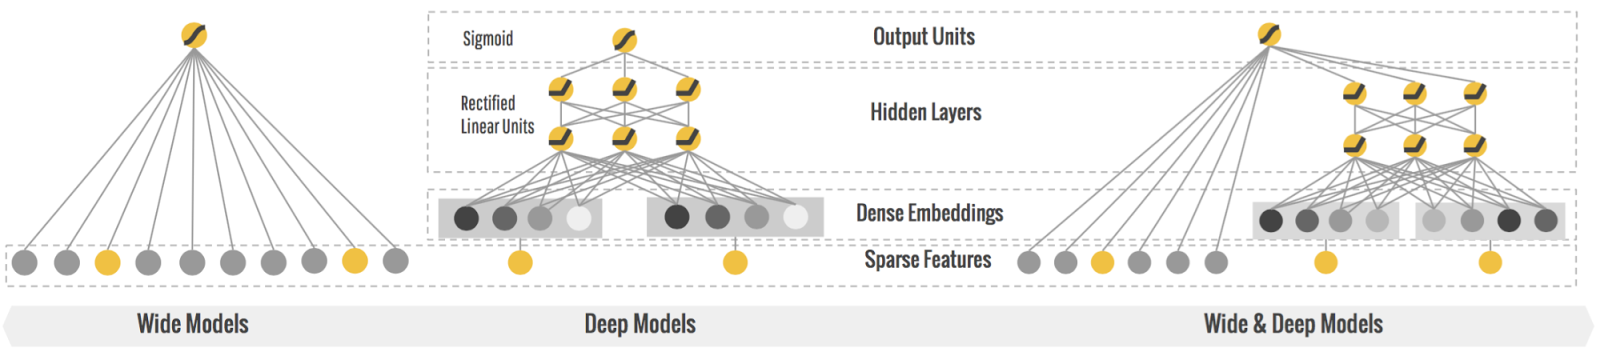

# wide component

输入特征包含原始特征以及组合特征(cross-product transformation)，组合特征的定义:

$${\phi _k}(x) = \prod\limits_{i = 1}^d {x_i^{{c_{ki}}}} {\qquad}{c_{ki}} \in \{ 0,1\} $$

*"For binary features, a cross-product transformation (e.g.,
`AND(gender=female, language=en))` is 1 if and only if the constituent features (`gender=female and language=en`)
are all 1, and 0 otherwise"*.

# deep component

feed-forward neural network. embedding随机初始化。


# joint training

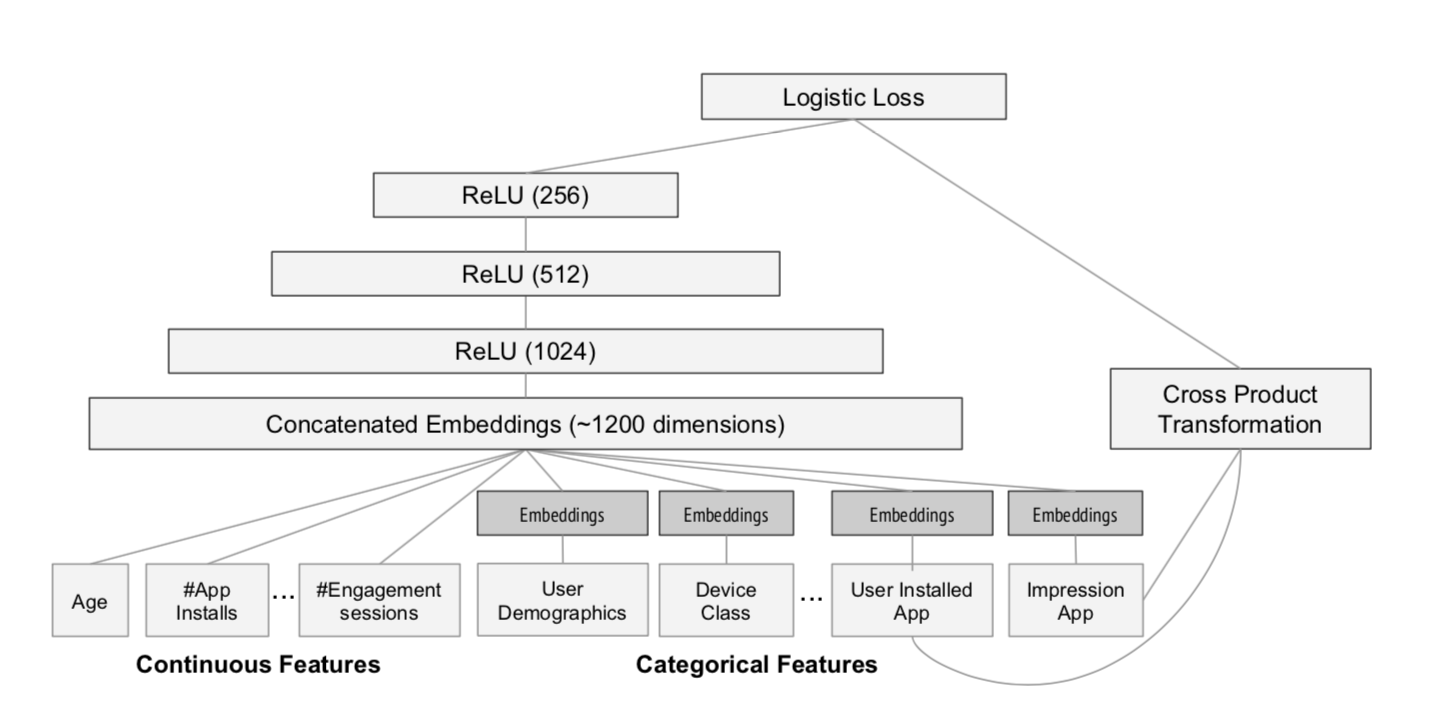

## 特征选择

1. Select features for the wide part: Choose the sparse base columns and crossed columns you want to use.
2. Select features for the deep part: Choose the continuous columns, the embedding dimension for each categorical column, and the hidden layer sizes.